In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 데이터 불러오기
data_path = r"C:\Users\james\J_Data_Lab\Project-FXCast\crawler\data\investing_content_sentiment.csv"
df = pd.read_csv(data_path)
df

,nickname,date,content,sentiment,score
0,B Choi,2020-01-01,유로와 캐나다 달러 쪽이 심상찮음. 달러 폭락을 기정사실화 하는 흐름 확인 필요. ...,LABEL_1,0.866128
1,NaN,2020-01-01,원화 가치 상승은 기정사실 1100원대가 눈앞이다,LABEL_1,0.946214
2,Joe shrimp,2020-01-01,볼커룰 걔정안은 은행권의 적응 기간을 고려해 2020년 내년 1월 1일부터 발효 아...,LABEL_1,0.573899
3,woojoon Jin,2020-01-01,떡국 한그릇들 하셨나요. 달러원이 결국 본질가치로 회귀해서 1150원대까지 왔네요....,LABEL_1,0.887746
4,a j,2020-01-02,달러 하락 1100원 이탈시 매수,LABEL_1,0.938673
...,...,...,...,...,...
280440,제갈 공명,2024-12-31,"정부, 내년도에 1년물 단기 원화표시 외평채 20조원 발행 계획 발표. 대기업 법인...",LABEL_1,0.883267
280441,Re START,2024-12-31,내는 애국자답게 서학과 외인이럴 응원혀버리긋다.,LABEL_1,0.708625
280442,yes you,2024-12-31,헌법재판관 2명 입명했다고 내린거같은데 지금 당장 사시면 됩니다,LABEL_0,0.756092
280443,주수 김,2024-12-31,역시나 헌재 지연이 경제나락 1순위였네 바로 5원을 누르네,LABEL_0,0.815979


In [3]:
# score가 0.95 초과인 행만 남김
df = df[df["score"] > 0.9]

In [4]:
df

,nickname,date,content,sentiment,score
1,NaN,2020-01-01,원화 가치 상승은 기정사실 1100원대가 눈앞이다,LABEL_1,0.946214
4,a j,2020-01-02,달러 하락 1100원 이탈시 매수,LABEL_1,0.938673
10,持ち 金,2020-01-02,환율좀 퐁낙시켜서. 한국증시 대세상승 가자,LABEL_1,0.913794
13,j oo,2020-01-02,다음주나 다다음 주에 1170원대 다시 찍겠네요,LABEL_1,0.932956
15,lllllllll aaaaaaa,2020-01-02,"하여간 1,100원 드립하면기겁을 해서 다시 오른다니깐",LABEL_1,0.933759
...,...,...,...,...,...
280390,봉래 조,2024-12-31,용산돼지는 끌려나오기 전에 수사 받으러 가라,LABEL_0,0.910425
280402,jo jo,2024-12-31,위안화 급등하는거 보니 곧 따라갈듯,LABEL_1,0.946907
280416,Re START,2024-12-31,금일 달/위안 7.35 돌파 가능.,LABEL_1,0.912634
280432,Re START,2024-12-31,금일. 서학+외인 vs 한응+으냉이의 세기적 대결 기대혀시라,LABEL_1,0.913170


In [5]:
# 날짜 처리
df["date"] = pd.to_datetime(df["date"], errors="coerce").dt.date

# 감정 점수 매핑
score_map = {"LABEL_1": 1, "LABEL_0": -1}
df["sentiment_score"] = df["sentiment"].map(score_map)

# 필요한 열 유지
df = df[["date", "content", "sentiment", "score", "sentiment_score"]].copy()

# aggregate 함수 정의
def aggregate_sentiment(group):
    sentiment_counts = group["sentiment"].value_counts()
    positive = sentiment_counts.get("LABEL_1", 0)
    negative = sentiment_counts.get("LABEL_0", 0)
    total = positive + negative
    avg_score = group["sentiment_score"].mean()
    content_joined = " ".join(group["content"].dropna().astype(str))
    
    return pd.DataFrame([{
        "date": group["date"].iloc[0],
        "positive": positive,
        "negative": negative,
        "total_comments": total,
        "score": avg_score,
        "content": content_joined
    }])


# 그룹핑 및 집계
df_grouped = df.groupby("date").apply(aggregate_sentiment).reset_index(drop=True)

C:\Users\james\AppData\Local\Temp\ipykernel_18204\1175730556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"], errors="coerce").dt.date
C:\Users\james\AppData\Local\Temp\ipykernel_18204\1175730556.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sentiment_score"] = df["sentiment"].map(score_map)
C:\Users\james\AppData\Local\Temp\ipykernel_18204\1175730556.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is depr

In [6]:
df_grouped

,date,positive,negative,total_comments,score,content
0,2020-01-01,1,0,1,1.000000,원화 가치 상승은 기정사실 1100원대가 눈앞이다
1,2020-01-02,4,0,4,1.000000,달러 하락 1100원 이탈시 매수 환율좀 퐁낙시켜서. 한국증시 대세상승 가자 다음주...
2,2020-01-03,1,5,6,-0.666667,"무슨 조루인가효? 美대사관, 미국민 이라크 지역에서 즉각대피 경보발령 지금도 늦지 ..."
3,2020-01-05,1,0,1,1.000000,나스닥 조정은 와도 추세는 상승여
4,2020-01-06,2,0,2,1.000000,아싸~ 달러 선물 현물 상승 가장 마음같아선 4억불을 사고 싶으나 돈이 없는 관계로...
...,...,...,...,...,...,...
1665,2024-12-27,23,30,53,-0.132075,친중세력들이 나라 붕괴시키는구나 역외때 보자고 억지로 막을수 있으면 외환위기 왜 오...
1666,2024-12-28,3,4,7,-0.142857,"환율이 어케 갈지는, 테더환율 참고하믄 된다 선반영 지표야 솔직히 우리나라 노답임 ..."
1667,2024-12-29,0,3,3,-1.000000,"조작국에 언논은 읎다, 그냥 당 기관지와 홍보방송일뿐 조작국에 차단된 사이트와 유투..."
1668,2024-12-30,10,7,17,0.176471,중국 정부가 침체된 경제 회복을 위해 내년에 사상 최대 규모인 3조 위안(599조원...


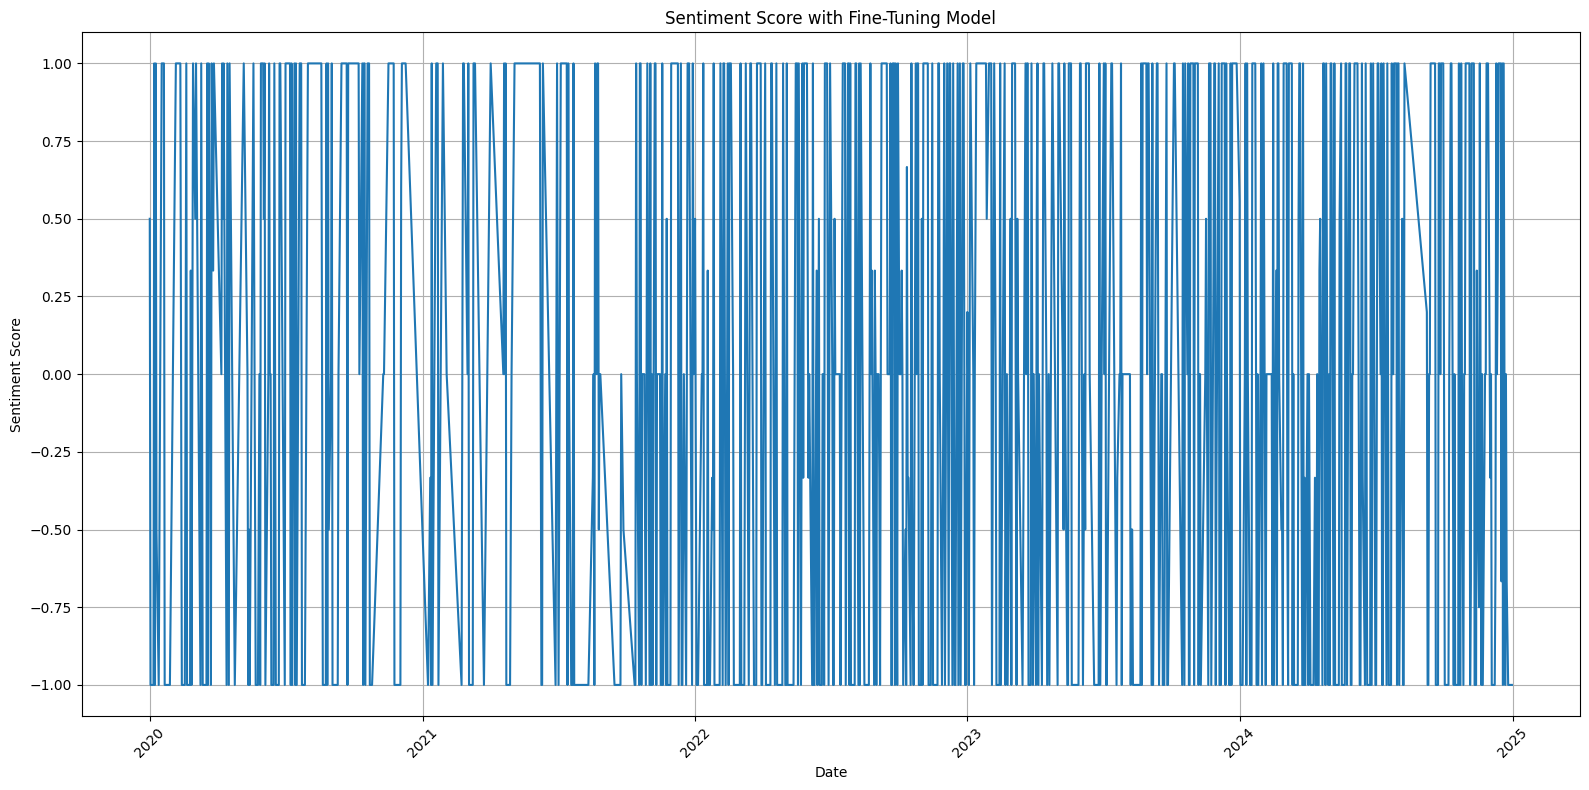

In [15]:
# 날짜 기준 정렬 
df_grouped = df_grouped.sort_values('date')

# 시각화
plt.figure(figsize=(16, 8))
plt.plot(df_grouped['date'], df_grouped['sentiment score'], linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score with Fine-Tuning Model')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [7]:
output_path = r"C:\Users\james\J_Data_Lab\Project-FXCast\crawler\data\investing_comment_sentiment_score_0.9.csv"
df_grouped.to_csv(output_path, index=False)

In [8]:
df_grouped

,date,positive,negative,total_comments,score,content
0,2020-01-01,1,0,1,1.000000,원화 가치 상승은 기정사실 1100원대가 눈앞이다
1,2020-01-02,4,0,4,1.000000,달러 하락 1100원 이탈시 매수 환율좀 퐁낙시켜서. 한국증시 대세상승 가자 다음주...
2,2020-01-03,1,5,6,-0.666667,"무슨 조루인가효? 美대사관, 미국민 이라크 지역에서 즉각대피 경보발령 지금도 늦지 ..."
3,2020-01-05,1,0,1,1.000000,나스닥 조정은 와도 추세는 상승여
4,2020-01-06,2,0,2,1.000000,아싸~ 달러 선물 현물 상승 가장 마음같아선 4억불을 사고 싶으나 돈이 없는 관계로...
...,...,...,...,...,...,...
1665,2024-12-27,23,30,53,-0.132075,친중세력들이 나라 붕괴시키는구나 역외때 보자고 억지로 막을수 있으면 외환위기 왜 오...
1666,2024-12-28,3,4,7,-0.142857,"환율이 어케 갈지는, 테더환율 참고하믄 된다 선반영 지표야 솔직히 우리나라 노답임 ..."
1667,2024-12-29,0,3,3,-1.000000,"조작국에 언논은 읎다, 그냥 당 기관지와 홍보방송일뿐 조작국에 차단된 사이트와 유투..."
1668,2024-12-30,10,7,17,0.176471,중국 정부가 침체된 경제 회복을 위해 내년에 사상 최대 규모인 3조 위안(599조원...
